In [11]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17493 (from 3)
Receiving objects: 100% (17511/17511), 16.65 MiB | 16.32 MiB/s, done.
Resolving deltas: 100% (11996/11996), done.
/content/yolov5/yolov5/yolov5


In [12]:
from google.colab import files
upload = files.upload()


Saving unnamed.png to unnamed.png


In [13]:
import shutil
import os

filename = list(upload.keys())[0]
safe_name = filename.replace(" ", "_").replace("(", "").replace(")", "")

source_path = f"/content/{filename}"
dest_path = f"/content/yolov5/{safe_name}"

if os.path.exists(source_path):
    shutil.move(source_path, dest_path)
    print(f"File berhasil dipindahkan ke: {dest_path}")
else:
    print(f"File tidak ditemukan: {source_path}")


File tidak ditemukan: /content/unnamed.png


In [14]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source {safe_name}


detect: weights=['yolov5s.pt'], source=unnamed.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

100% 14.1M/14.1M [00:00<00:00, 125MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/yolov5/yolov5/unnamed.png: 384x640 6 persons, 6 cars, 4 motorcycles, 1 bus, 2 trucks, 53.0ms
Speed: 0.7ms pre-process, 53.0ms inference, 198.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


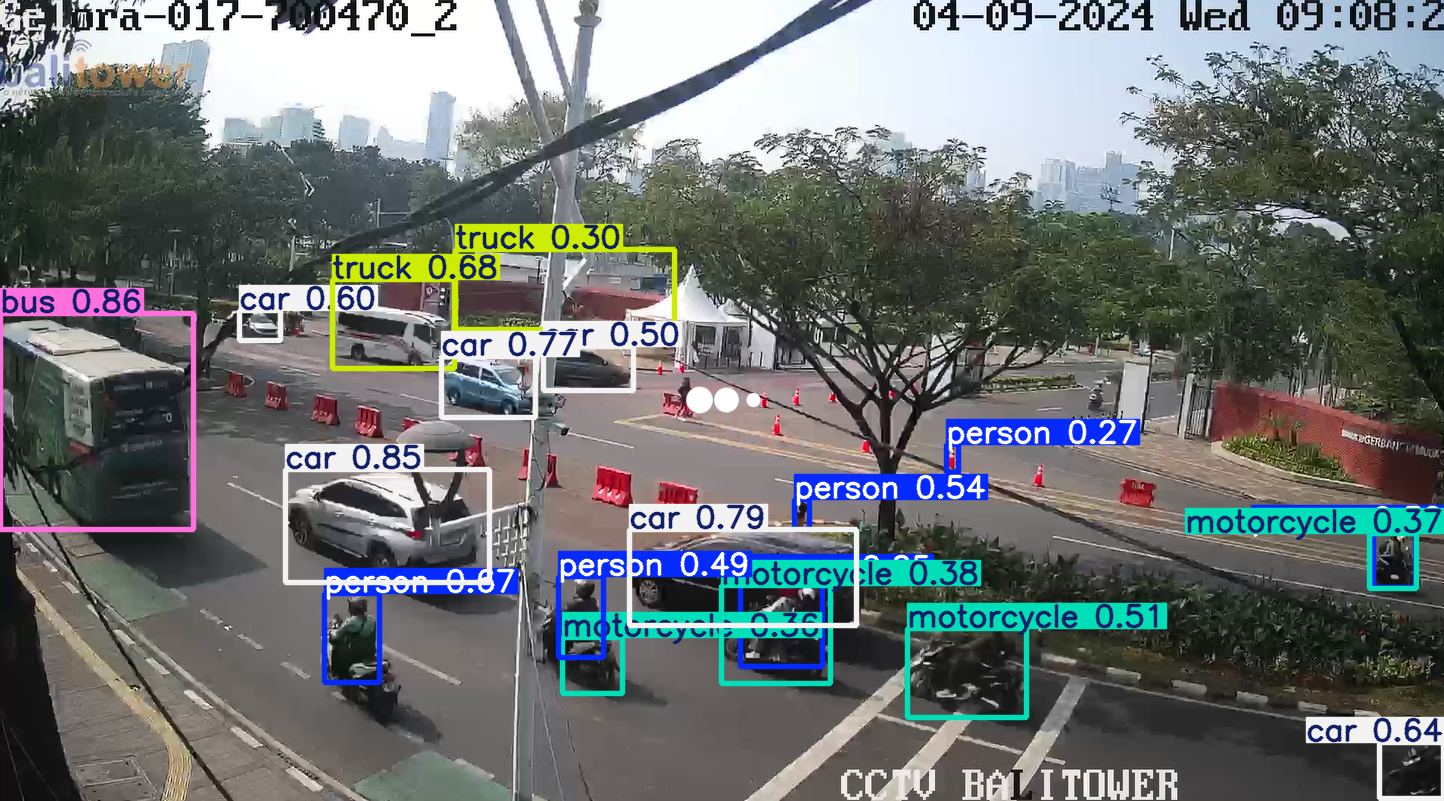

In [15]:
from IPython.display import Image, display
import glob

result_path = glob.glob('runs/detect/exp*/' + safe_name)[-1]
display(Image(filename=result_path))
